# Case Study #2

## 1. Case Study description

For each year we need the following information:
* Total revenue for the current year
* Total Customers Current Year / Total Customers Previous Year
* New Customers
* New Customer Revenue e.g. new customers not present in previous year only
* Existing Customer Revenue Current Year / Existing Customer Revenue Prior Year
* Existing Customer Growth. To calculate this, use the Revenue of existing customers for current year –(minus) Revenue of existing customers from the previous year
* Revenue lost from attrition
* Lost Customers

Additionally, generate a few unique plots highlighting some information from the dataset. 
Are there any interesting observations?


## 2. Dataset

A csv file with 3 years worth of customer orders. 
There are 4 columns in the csv dataset: 
* index, 
* CUSTOMER_EMAIL(unique identifier as hash), 
* Net_Revenue, and 
* Year.


## 3. Analysis

### 3.0 Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
filename = 'casestudy.csv'
df = pd.read_csv(filename, sep=',')

In [3]:
df.head()

,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015


In [4]:
df.shape

(685927, 4)

### 3.1 Total revenue for the current/previous year

In [5]:
all_years = df['year'].unique()

In [6]:
total_net_revenue = np.empty([len(all_years)], dtype=np.float64)
for index, current_year in enumerate(all_years):
    total_net_revenue[index] = df['net_revenue'][df['year']==current_year].sum()
    print(f"Current year is {current_year}.")
    print(f"Current net_revenue is {total_net_revenue[index]:.2f}.")
    print()

Current year is 2015.
Current net_revenue is 29036749.19.

Current year is 2016.
Current net_revenue is 25730943.59.

Current year is 2017.
Current net_revenue is 31417495.03.



### 3.2 Total Customers

In [7]:
customers_per_year = {}
for index, current_year in enumerate(all_years):
    customers_per_year[current_year] = set(df['customer_email'][df['year']==current_year])
    
total = 0
for index, (key, value) in enumerate(customers_per_year.items()):
    total += len(value)
    print(f"In current year={key}, there are {len(value)} customers.")
print(f"Total customers: {total}. Total revenue: {total_net_revenue.sum()}")

In current year=2015, there are 231294 customers.
In current year=2016, there are 204646 customers.
In current year=2017, there are 249987 customers.
Total customers: 685927. Total revenue: 86185187.81


### 3.3 New Customers / New Customer Revenue

In [8]:
new_customer_net_revenue = np.empty([len(all_years)], dtype=np.float64)

new_customers_per_year = {}
for index, current_year in enumerate(all_years):
    if current_year-1 != all_years[index-1]:
        new_customers_per_year[current_year] = list(customers_per_year[current_year])
    else:
        new_customers_per_year[current_year] = list(customers_per_year[current_year]-customers_per_year[current_year-1])
        
    new_customer_net_revenue[index] = df['net_revenue'][df['year']==current_year][df['customer_email'].isin(new_customers_per_year[current_year])].sum()

In [9]:
total = 0
for index, (key, value) in enumerate(new_customers_per_year.items()):
    total += len(value)
    print(f"In current year={key}, there were {len(value)} new customers. Current new customer revenue: {new_customer_net_revenue[index]:.2f}")
print(f"Total new customers: {total}. Total new revenue: {new_customer_net_revenue.sum()}")

In current year=2015, there were 231294 new customers. Current new customer revenue: 29036749.19
In current year=2016, there were 145062 new customers. Current new customer revenue: 18245491.01
In current year=2017, there were 229028 new customers. Current new customer revenue: 28776235.04
Total new customers: 605384. Total new revenue: 76058475.24


### 3.3 Existing Customer Revenue Current/Prior Year

In [10]:
existing_net_revenue = total_net_revenue - new_customer_net_revenue
for index, current_year in enumerate(all_years):
    print(f"Current year is {current_year}.")
    print(f"Current existing customer net revenue is {existing_net_revenue[index]:.2f}.")
    print()

Current year is 2015.
Current existing customer net revenue is 0.00.

Current year is 2016.
Current existing customer net revenue is 7485452.58.

Current year is 2017.
Current existing customer net revenue is 2641259.99.



### 3.4 Existing Customer Growth

Existing Customer Growth.  
To calculate this, use the Revenue of existing customers for current year –(minus) Revenue of existing customers from the previous year

In [11]:
existing_customer_growth = np.empty([len(all_years)], dtype=np.float64)

for index, current_year in enumerate(all_years):
    if current_year-1 != all_years[index-1]:
        existing_customer_growth[index] = 0.0
    else:
        existing_customer_growth[index] = existing_net_revenue[index] - existing_net_revenue[index-1]

In [12]:
for index, current_year in enumerate(all_years):
    print(f"Current year is {current_year}.")
    print(f"Current customer growth is {existing_customer_growth[index]:.2f}.")
    print()

Current year is 2015.
Current customer growth is 0.00.

Current year is 2016.
Current customer growth is 7485452.58.

Current year is 2017.
Current customer growth is -4844192.59.



### 3.5 Lost Customers

In [13]:
lost_customers = {}
for index, current_year in enumerate(all_years):
    if current_year-1 != all_years[index-1]:
        lost_customers[current_year] = []
    else:
        lost_customers[current_year] = list(customers_per_year[current_year-1] - customers_per_year[current_year])

total = 0
for index, (key, value) in enumerate(lost_customers.items()):
    total += len(value)
    print(f"In current year={key}, there are {len(value)} customers.")

In current year=2015, there are 0 customers.
In current year=2016, there are 171710 customers.
In current year=2017, there are 183687 customers.


### 3.6 Revenue lost from attrition

In [14]:
revenue_lost_attrition = np.empty([len(all_years)], dtype=np.float64)
for index, current_year in enumerate(all_years):
    if current_year-1 != all_years[index-1]:
        revenue_lost_attrition[index] = 0.0
    else:
        revenue_lost_attrition[index] = df['net_revenue'][df['year']==current_year-1][df['customer_email'].isin(lost_customers[current_year])].sum()

In [15]:
for index, current_year in enumerate(all_years):
    print(f"Current year is {current_year}.")
    print(f"Current revenue lost from attrition is {revenue_lost_attrition[index]:.2f}.")
    print()

Current year is 2015.
Current revenue lost from attrition is 0.00.

Current year is 2016.
Current revenue lost from attrition is 21571632.07.

Current year is 2017.
Current revenue lost from attrition is 23110294.94.



## 4. Observations

In [16]:
df.head(n=10)

,Unnamed: 0,customer_email,net_revenue,year
0,0,nhknapwsbx@gmail.com,249.92,2015
1,1,joiuzbvcpn@gmail.com,87.61,2015
2,2,ukkjctepxt@gmail.com,168.38,2015
3,3,gykatilzrt@gmail.com,62.40,2015
4,4,mmsgsrtxah@gmail.com,43.08,2015
5,5,mobvusnzfr@gmail.com,39.44,2015
6,6,kxwkqvacsv@gmail.com,171.46,2015
7,7,iqmnugdcjs@gmail.com,111.99,2015
8,8,baiikostmd@gmail.com,170.70,2015
9,9,lfeafnigbu@gmail.com,54.99,2015


* Limited years
* The higher revenue comes from new customers. Not for the existing customers.
* The customers doesn't buy for muliple years.
* The company must find a way to attract new customers.
* In the last year, the revenue from new customers is higher then the revenue lost form attrition.

In [18]:
df.groupby(['customer_email', 'net_revenue'])['net_revenue'].transform('sum').mean()

125.64835495613961

In [19]:
df.groupby(['customer_email', 'net_revenue','year'])['net_revenue'].transform('sum').mean()

125.6477552421759

In [20]:
df.groupby(['customer_email', 'year'])['year'].transform('count').sum()

685927

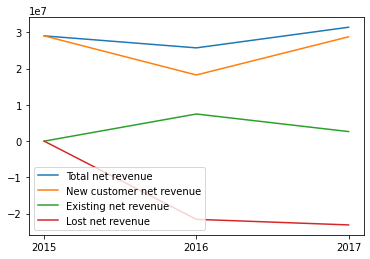

In [21]:
plt.plot(all_years, total_net_revenue, label='Total net revenue')
plt.plot(all_years, new_customer_net_revenue, label='New customer net revenue')
plt.plot(all_years, existing_net_revenue, label='Existing net revenue')
plt.plot(all_years, -1*revenue_lost_attrition, label='Lost net revenue')
plt.xticks(all_years)
plt.legend(loc='lower left')
plt.show()

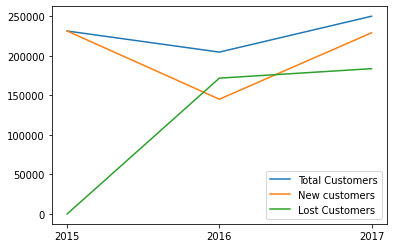

In [22]:
total_lost = []
total_ll = []
total_new = []
for index, (key, value) in enumerate(lost_customers.items()):
    total_lost.append(len(value))
    total_new.append(len(new_customers_per_year[key]))
    total_ll.append(len(customers_per_year[key]))
    
plt.plot(all_years, total_ll, label='Total Customers')
plt.plot(all_years, total_new, label='New customers')
plt.plot(all_years, total_lost, label='Lost Customers')
plt.xticks(all_years)
plt.legend(loc='lower right')
plt.show()

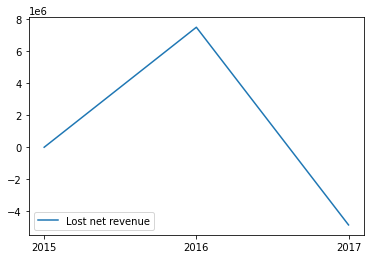

In [23]:
plt.plot(all_years, existing_customer_growth, label='Lost net revenue')
plt.xticks(all_years)
plt.legend(loc='lower left')
plt.show()